In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
exercise_df = pd.read_csv(r"C:\Users\dell\Desktop\exercise.csv")
calories_df = pd.read_csv(r"C:\Users\dell\Desktop\calories.csv")
df = pd.merge(exercise_df, calories_df, on="User_ID")

# Encode gender (if needed)
df['Gender'] = df['Gender'].map({'male': 1, 'female': 0})

# Focus on one feature: Duration
x = df["Duration"].values  # shape (m,)
y = df["Calories"].values  # shape (m,)

In [15]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost += (f_wb - y[i]) ** 2
    return cost / (2 * m)

In [16]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = w * x[i] + b
        error = f_wb - y[i]
        dj_dw += error * x[i]
        dj_db += error
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

In [17]:
def gradient_descent(x, y, w_init, b_init, alpha, num_iters):
    w = w_init
    b = b_init
    J_history = []
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)

        w -= alpha * dj_dw
        b -= alpha * dj_db

        cost = compute_cost(x, y, w, b)
        J_history.append(cost)

        # Print every 10% of steps
        if i % (num_iters // 10) == 0:
            print(f"Iter {i:4}: Cost={cost:.2f}, w={w:.4f}, b={b:.4f}")
    return w, b, J_history

In [18]:
# Initial values
w_init = 0
b_init = 0
alpha = 0.0001  # try small values first
iterations = 1000

w_final, b_final, J_hist = gradient_descent(x, y, w_init, b_init, alpha, iterations)
print(f"Final parameters: w = {w_final:.4f}, b = {b_final:.4f}")

Iter    0: Cost=5607.65, w=0.1887, b=0.0090
Iter  100: Cost=234.19, w=5.8168, b=0.2414
Iter  200: Cost=224.30, w=6.0576, b=0.2042
Iter  300: Cost=224.04, w=6.0701, b=0.1557
Iter  400: Cost=223.80, w=6.0730, b=0.1068
Iter  500: Cost=223.56, w=6.0755, b=0.0580
Iter  600: Cost=223.32, w=6.0779, b=0.0093
Iter  700: Cost=223.09, w=6.0804, b=-0.0393
Iter  800: Cost=222.85, w=6.0828, b=-0.0877
Iter  900: Cost=222.62, w=6.0852, b=-0.1361
Final parameters: w = 6.0876, b = -0.1839


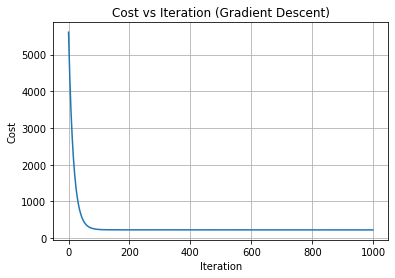

In [19]:
plt.plot(J_hist)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost vs Iteration (Gradient Descent)")
plt.grid(True)
plt.show()

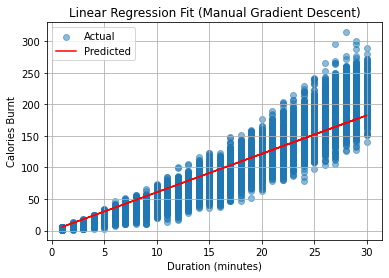

In [20]:
# Plot original data
plt.scatter(x, y, label="Actual", alpha=0.5)

# Predicted line
y_pred_line = w_final * x + b_final
plt.plot(x, y_pred_line, color='red', label="Predicted")

plt.xlabel("Duration (minutes)")
plt.ylabel("Calories Burnt")
plt.title("Linear Regression Fit (Manual Gradient Descent)")
plt.legend()
plt.grid(True)
plt.show()